In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime as dt
import datetime

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(78.0, 0.0, 'USC00519397', 2370, '2016-08-29')
(79.0, 0.0, 'USC00519397', 2371, '2016-08-30')
(80.0, 0.13, 'USC00519397', 2372, '2016-08-31')
(81.0, 0.0, 'USC00519397', 2373, '2016-09-01')
(80.0, 0.0, 'USC00519397', 2374, '2016-09-02')
(79.0, 0.0, 'USC00519397', 2375, '2016-09-03')
(75.0, 0.03, 'USC00519397', 2376, '2016-09-04')
(79.0, None, 'USC00519397', 2377, '2016-09-05')
(76.0, None, 'USC00519397', 2378, '2016-09-06')
(76.0, 0.05, 'USC00519397', 2379, '2016-09-07')
(80.0, 0.0, 'USC00519397', 2380, '2016-09-08')
(79.0, 0.03, 'USC00519397', 2381, '2016-09-09')
(78.0, 0.0, 'USC00519397', 2382, '2016-09-10')
(76.0, 0.05, 'USC00519397', 2383, '2016-09-11')
(78.0, 0.0, 'USC00519397', 2384, '2016-09-12')
(78.0, 0.02, 'USC00519397', 2385, '2016-09-13')
(75.0, 1.32, 'USC00519397', 2386, '2016-09-14')
(79.0, 0.42, 'USC00519397', 2387, '2016-09-15')
(80.0, 0.06, 'USC00519397', 2388, '2016-09-16')
(79.0, 0.05, 'USC00519397', 2389, '2016-09-17')
(81.0, 0.0, 'USC00519397', 2390, '2016-09-18')
(

(67.0, 1.62, 'USC00516128', 19301, '2016-12-03')
(76.0, 0.31, 'USC00516128', 19302, '2016-12-04')
(67.0, 1.6, 'USC00516128', 19303, '2016-12-05')
(67.0, 0.0, 'USC00516128', 19304, '2016-12-06')
(68.0, 0.02, 'USC00516128', 19305, '2016-12-07')
(71.0, 0.03, 'USC00516128', 19306, '2016-12-08')
(68.0, 0.42, 'USC00516128', 19307, '2016-12-09')
(68.0, 0.04, 'USC00516128', 19308, '2016-12-10')
(69.0, 0.13, 'USC00516128', 19309, '2016-12-11')
(65.0, 0.01, 'USC00516128', 19310, '2016-12-12')
(70.0, 0.09, 'USC00516128', 19311, '2016-12-13')
(69.0, 0.33, 'USC00516128', 19312, '2016-12-14')
(64.0, 0.03, 'USC00516128', 19313, '2016-12-15')
(60.0, 0.0, 'USC00516128', 19314, '2016-12-16')
(67.0, None, 'USC00516128', 19315, '2016-12-18')
(72.0, 0.15, 'USC00516128', 19316, '2016-12-19')
(73.0, 0.0, 'USC00516128', 19317, '2016-12-20')
(70.0, 0.55, 'USC00516128', 19318, '2016-12-21')
(68.0, 1.24, 'USC00516128', 19319, '2016-12-22')
(69.0, 0.83, 'USC00516128', 19320, '2016-12-23')
(69.0, 1.08, 'USC0051612

<IPython.core.display.Javascript object>


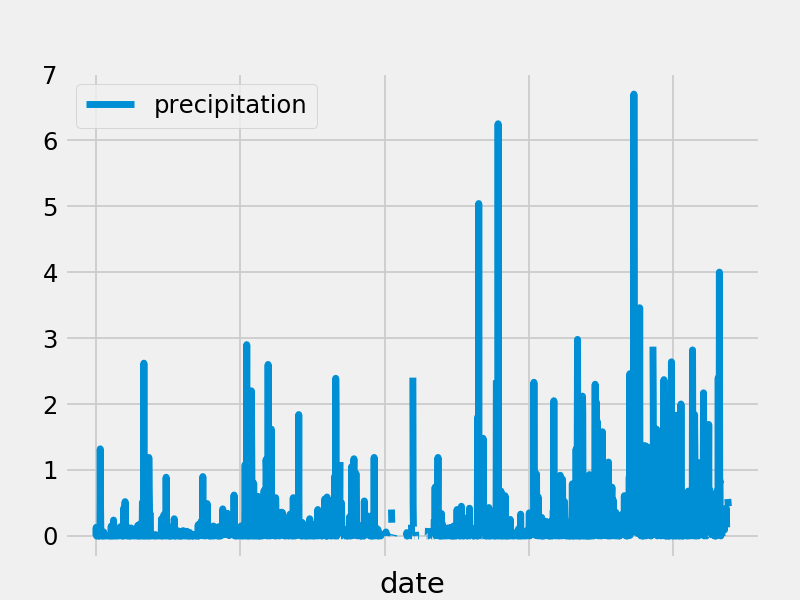

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
oneYearAgo = dt.now() - datetime.timedelta(days=2*365)
# Perform a query to retrieve the data and precipitation scores
for row in session.query(Measurement.tobs, Measurement.prcp, Measurement.station, Measurement.id, Measurement.date)\
    .filter(Measurement.date >= oneYearAgo).all():
    print(row)
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.tobs, Measurement.prcp, Measurement.station, Measurement.id, Measurement.date)\
    .filter(Measurement.date >= oneYearAgo).all()

df = pd.DataFrame(results, columns=['tobs', 'precipitation', 'station', 'id', 'date'])
df.set_index('date', inplace=True, )
df.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
prcpPlot = df.reset_index().plot(x='date', y='precipitation', kind='line')
# Rotate the xticks for the dates


In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
describe_precipitation = df['precipitation'].describe()
describe_precipitation

count    1985.000000
mean        0.172383
std         0.453252
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [12]:
# How many stations are available in this dataset?
station_count = df['station'].count()
station_count

2191

In [11]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_activity = df.groupby('station').count().sort_values(['id'], ascending=False)
station_activity

,tobs,precipitation,id
station,,,
USC00519397,355,353,355
USC00519281,346,346,346
USC00516128,344,324,344
USC00513117,337,337,337
USC00519523,331,308,331
USC00514830,299,259,299
USC00517948,179,58,179


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
max_calc = df.loc[df["station"] == "USC00519397"].groupby('station').max()
min_calc = df.loc[df["station"] == "USC00519397"].groupby('station').min()
mean_calc = df.loc[df["station"] == "USC00519397"].groupby('station').mean()


,tobs,precipitation,id
station,,,
USC00519397,75.146479,0.045099,2547


<IPython.core.display.Javascript object>


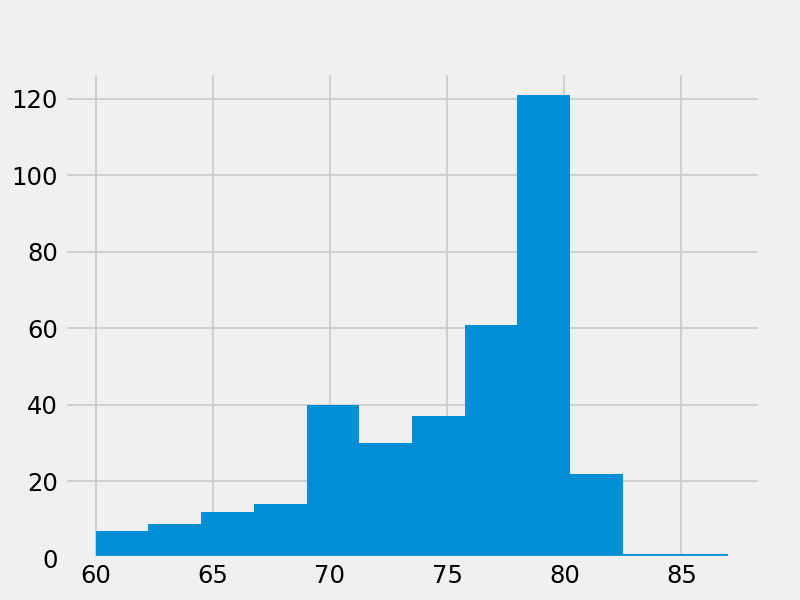

In [29]:
# Choose the station with the highest number of temperature observations.
station_histo_df = max_calc = df.loc[df["station"] == "USC00519397"]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure()
plt.hist(station_histo_df["tobs"], bins = 12)
plt.show()

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
